In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('dataws_10 (1).csv')

In [3]:
print(df)

    RPM_Feeder  Amp_Press  Temp_Cond_1  Temp_Cond_2  Temp_Cond_3  \
0          186       97.1         69.4         73.3         76.3   
1          204       97.2         70.6         75.5         80.2   
2          204       97.2         70.6         75.5         80.2   
3          203       96.5         68.3         73.4         79.1   
4          200       95.7         68.2         73.7         80.9   
5          200       96.0         67.4         72.9         80.1   
6          198       95.4         67.4         72.9         80.4   
7          199       95.9         66.9         72.4         80.3   
8          201       95.9         66.2         71.9         79.9   
9          201       95.9         66.9         72.0         79.6   
10         186       97.5         74.4         76.3         81.2   
11         186       97.6         77.4         81.6         85.3   
12         204       97.2         70.6         75.5         80.2   
13         203       96.5         68.3         7

In [27]:
# Memisahkan fitur (X) dan target (y)
X = df[['RPM_Feeder', 'Amp_Press', 'Temp_Cond_1', 'Temp_Cond_2', 'Temp_Cond_3', 'Temp_Post_Pellet']]  # Fitur
y = df['WS_Dryer']  # Target

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Membuat dan melatih model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [18]:
# Prediksi harga rumah berdasarkan data uji
y_pred = model.predict(X_test)

In [29]:
# Menampilkan hasil prediksi dan nilai asli
print("\nPrediksi WS:")
print(y_pred)

# Menampilkan nilai R^2 (koefisien determinasi)
print(f"\nNilai R^2: {model.score(X_test, y_test):.4f}")


Prediksi WS:
[0.56698932 0.68277387 0.42132897 0.84953625 0.43761481 0.57301518]

Nilai R^2: -15.8292


In [30]:
# Evaluasi model: MSE, RMSE, dan MAE
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.16
Mean Absolute Error (MAE): 0.14


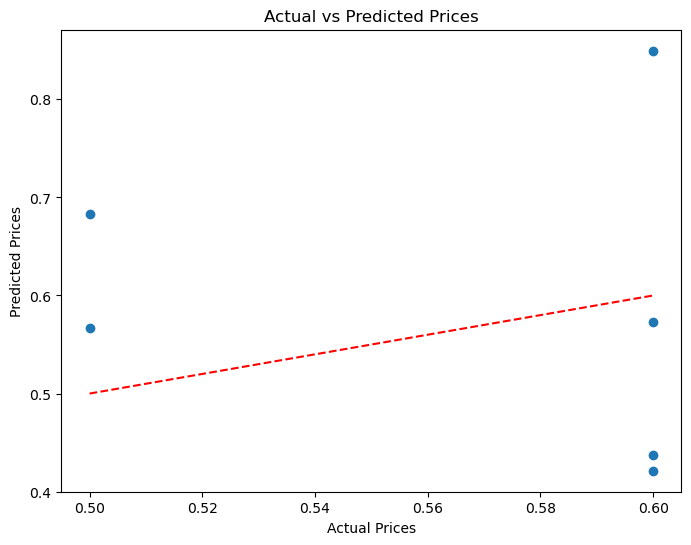

In [31]:
# Plotting hasil prediksi vs nilai asli
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()


In [32]:
def prediksi_harga():
    # Input data dari pengguna
    print("Masukkan Data:")
    
    RPM_Feeder = float(input("Masukkan data RPM Feeder: "))
    Amp_Press = float(input("Masukkan data Amp Press: "))
    Temp_Cond_1 = float(input("Masukkan data Temp Cond 1: "))
    Temp_Cond_2 = float(input("Masukkan data Temp Cond 2: "))
    Temp_Cond_3 = float(input("Masukkan data Temp Cond 3: "))
    Temp_Post_Pellet = float(input("Masukkan data Temp Post Pellet: "))

    # Membuat array fitur dari input pengguna
    input_data = np.array([[RPM_Feeder, Amp_Press, Temp_Cond_1, Temp_Cond_2, Temp_Cond_3, Temp_Post_Pellet]])
    
    # Memuat model yang sudah dilatih (misalnya menggunakan pickle)
    # Inisialisasi model untuk contoh ini (gunakan model yang telah disimpan dengan pickle)
    # with open(model_filename, 'rb') as f:
    #     model = pickle.load(f)

    # Prediksi harga menggunakan model
    prediksi = model.predict(input_data)
    
    # Menampilkan hasil prediksi
    # Extract the predicted value as a float before formatting
    predicted_value = prediksi[0].item()  # Convert to native Python float
    # Added precision to the format specifier (e.g., .0f for 0 decimal places)
    print(f"\nPrediksi WS adalah: {predicted_value:,.2f}") # Changed from {predicted_value:,.f} to {predicted_value:,.0f}


# Menjalankan fungsi prediksi
prediksi_harga()

Masukkan Data:
Masukkan data RPM Feeder: 201
Masukkan data Amp Press: 97
Masukkan data Temp Cond 1: 68
Masukkan data Temp Cond 2: 73
Masukkan data Temp Cond 3: 81
Masukkan data Temp Post Pellet: 116

Prediksi WS adalah: 0.57


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
pip install streamlit

In [35]:
import streamlit as st

In [39]:
import pickle

In [42]:
pickle.dump(model, open('Prediksi_PU.sav', 'wb'))

In [46]:
model = pickle.load(open('Prediksi_PU.sav','rb'))

In [47]:
st.title("WS Prediction!")

2024-11-21 23:00:03.007 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 23:00:03.008 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [48]:
RPM_Feeder = st.text_input('input data RPM_Feeder')
Amp_Press = st.text_input('input data Amp_Press')
Temp_Cond_1 = st.text_input('input data Temp_Cond_1')
Temp_Cond_2 = st.text_input('input data Temp_Cond_2')
Temp_Cond_3 = st.text_input('input data Temp_Cond_3')
Temp_Post_Pellet = st.text_input('input data Temp_Post_Pellet')

2024-11-21 23:00:13.672 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 23:00:13.673 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 23:00:13.675 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 23:00:13.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 23:00:13.678 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 23:00:13.679 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 23:00:13.680 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 23:00:13.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [52]:
pip install streamlit-jupyter


  Obtaining dependency information for streamlit-jupyter from https://files.pythonhosted.org/packages/a8/58/66f78a4251217a82f805d9c93574fde800a7be288fca5635ad85a1d87cc9/streamlit_jupyter-0.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for fastcore from https://files.pythonhosted.org/packages/4a/ac/41f6f2d4840d5b1521881adbfee8b2000e5f5d4e762a945c15c7bd4af90a/fastcore-1.7.20-py3-none-any.whl.metadata
  Obtaining dependency information for ipywidgets==7.7.2 from https://files.pythonhosted.org/packages/d9/33/b318bd7cb2672a59466c3dcd24760f2221c163e851c9006b6c26af2c9152/ipywidgets-7.7.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for stqdm from https://files.pythonhosted.org/packages/08/e3/63cf2a221dc4c5894c2e42a7916ddcde8e5846f9551c2e9ed83024934fa3/stqdm-0.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~=3.6.0 from https://files.pythonhosted.org/packages/93/1b/25d570ee8dce0f2ddadb967d6242cf6e10516db7897c7d9a6e3

In [55]:
import subprocess

# Jalankan aplikasi Streamlit menggunakan subprocess
subprocess.run(["streamlit", "run", "streamlit_app.py"])

CompletedProcess(args=['streamlit', 'run', 'streamlit_app.py'], returncode=2)

NameError: name 'streamlit_app' is not defined